In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [2]:
np.random.seed(42)
n_transactions = 10000
amounts = np.random.exponential(scale=100, size=n_transactions)
fraudulent = np.random.binomial(1, 0.01, size=n_transactions)
data = pd.DataFrame({'Amount': amounts, 'Fraudulent': fraudulent})

In [3]:
data.head()

,Amount,Fraudulent
0,46.926809,0
1,301.012143,0
2,131.674569,0
3,91.294255,0
4,16.962487,0


In [4]:
summary_stats = data.describe()
print(summary_stats)

             Amount    Fraudulent
count  10000.000000  10000.000000
mean      97.749895      0.011700
std       97.440471      0.107537
min        0.001163      0.000000
25%       28.279917      0.000000
50%       67.831496      0.000000
75%      134.709830      0.000000
max      817.244560      1.000000


Text(0, 0.5, 'Frequency')

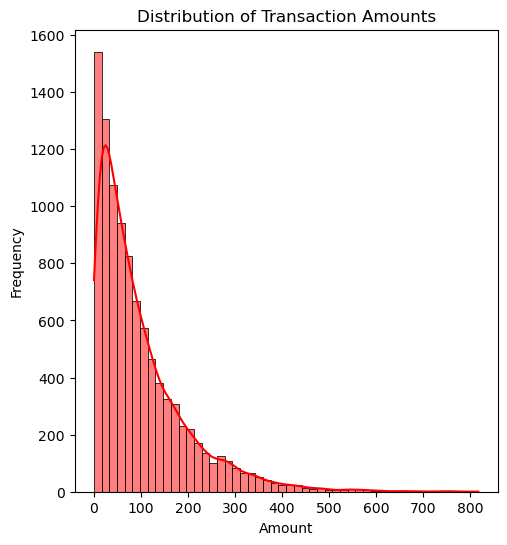

In [5]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Amount'], bins=50, kde=True, color='red')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')

([<matplotlib.axis.XTick at 0x1f1f6fc8130>,
 [Text(0, 0, 'Non-Fraudulent'), Text(1, 0, 'Fraudulent')])

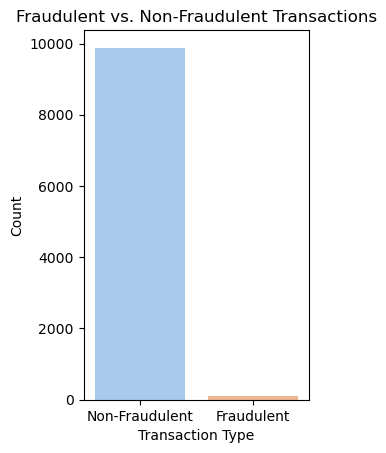

In [6]:
plt.subplot(1, 2, 2)
fraud_counts = data['Fraudulent'].value_counts()
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='pastel')
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'])

In [7]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [8]:
np.random.seed(0)
timestamps = pd.date_range('2023-01-01', periods=n_transactions, freq='H')
data['Timestamp'] = timestamps

In [9]:
data['Hour'] = data['Timestamp'].dt.hour

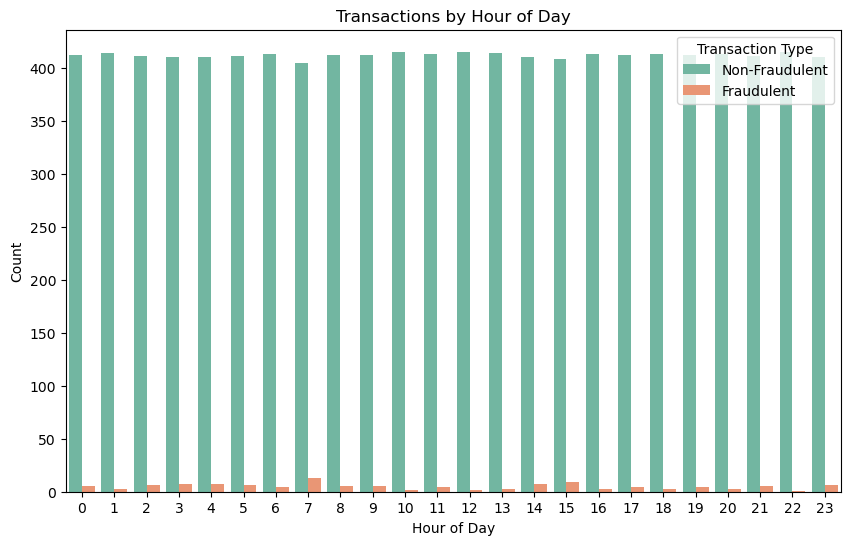

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', hue='Fraudulent', data=data, palette='Set2')
plt.title('Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend(title='Transaction Type', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

In [11]:
X = data[['Amount', 'Hour']]  # Example: Include more features as needed
y = data['Fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
y_pred = model.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.989


In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1978    0]
 [  22    0]]


In [16]:
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = roc_auc_score(y_test, y_pred)

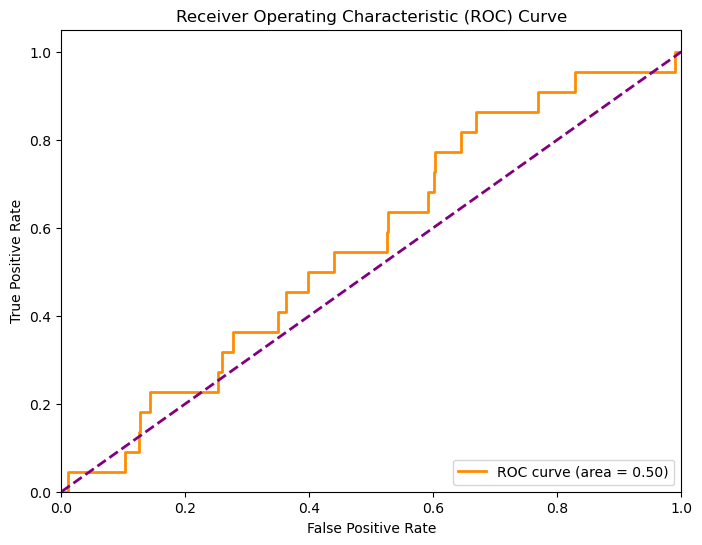

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='purple', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()